## Definition
- Web scraping refers to the process of extracting data from a website using software designed to harvest information at scale. During this automated process, unstructured data is scanned and copied from web pages, then converted into a structured data set and exported into a spreadsheet or database
- Web scraping software may directly access the World Wide Web using the Hypertext Transfer Protocol or a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler.

### Legal issues relating to web scrapping
Web scraping is legal in most jurisdictions. However, using copyright data contains certain restrictions³. In the United States, website owners can use three major legal claims to prevent undesired web scraping: (1) copyright infringement (compilation), (2) violation of the Computer Fraud and Abuse Act ("CFAA"), and (3) trespass to chattel⁴. The Computer Fraud and Abuse Act (CFAA) is a law enacted to prevent computer hackers. It prevents fetching data by getting unauthorized access to a page³. If you are planning on web scraping, it is important to be aware of the legal issues surrounding it. You can read more about it in this article².

Source: Conversation with Bing, 8/21/2023
(1) Essential Legal Issues Associated With Web Scraping. https://roboticsandautomationnews.com/2020/04/06/essential-legal-issues-associated-with-web-scraping/31501/.
(2) Web scraping - Wikipedia. https://en.wikipedia.org/wiki/Web_scraping.
(3) What are the legal issues around web scraping? - Evan Brown technology .... http://evan.law/2020/09/09/what-are-the-legal-issues-around-web-scraping/.
(4) Web scraping is legal, US appeals court reaffirms | TechCrunch. https://techcrunch.com/2022/04/18/web-scraping-legal-court/.
(5) Is Web Scraping Legal? The Complete Guide - ScraperAPI. https://www.scraperapi.com/blog/is-web-scraping-legal/.

**Here we will be using oscar-awarding films from wikipedia as our web source**

In [1]:
# Importing libraries needed
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

In [2]:
# specify the url then request for it by get()
url = "https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films"
req = requests.get(url)

**HTTP** defines a set of request methods to indicate the desired action to be performed for a given resource. The most commonly used HTTP request methods are _GET, POST, PUT, PATCH, and DELETE_. Here is a brief description of each method:

- **GET**: requests a representation of the specified resource. Requests using GET should only retrieve data.
- **HEAD**: asks for a response identical to a GET request, but without the response body.
- **POST**: submits an entity to the specified resource, often causing a change in state or side effects on the server.
- **PUT**: replaces all current representations of the target resource with the request payload.
- **DELETE**: deletes the specified resource.
- **CONNECT**: establishes a tunnel to the server identified by the target resource.
- **OPTIONS**: describes the communication options for the target resource.
- **TRACE**: performs a message loop-back test along the path to the target resource.
- **PATCH**: applies partial modifications to a resource

In [3]:
## Checking the status code
req

<Response [200]>

### Status codes
- **200 OK**: The request has succeeded.
- **201 Created**: The request has been fulfilled and resulted in a new resource being created.
- **204 No Content**: The server has fulfilled the request but does not need to return an entity-body.
- **301 Moved Permanently**: The requested resource has been assigned a new permanent URI and any future references to this resource should use one of the returned URIs.
- **400 Bad Request**: The request could not be understood by the server due to malformed syntax.
- **401 Unauthorized**: The request requires user authentication.
- **403 Forbidden**: The server understood the request, but is refusing to fulfill it.
- **404 Not Found**: The server has not found anything matching the Request-URI.
- **500 Internal Server Error**: The server encountered an unexpected condition which prevented it from fulfilling the request.

In [4]:
soup = BeautifulSoup(req.content)

In [5]:
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Academy Award-winning films - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";var cookie=document.cookie.match(/(?:^|; )enwikim

In [6]:
# get only the data in <tr> tags
for i in soup.findAll('tr'):
    print(i)

<tr>
<th>Film
</th>
<th>Year
</th>
<th data-sort-type="number">Awards
</th>
<th data-sort-type="number">Nominations
</th></tr>
<tr style="background:#EEDD82">
<td><i><b><a href="/wiki/Everything_Everywhere_All_at_Once" title="Everything Everywhere All at Once">Everything Everywhere All at Once</a></b></i></td>
<td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>
<td>7</td>
<td>11
</td></tr>
<tr>
<td><i><a href="/wiki/All_Quiet_on_the_Western_Front_(2022_film)" title="All Quiet on the Western Front (2022 film)">All Quiet on the Western Front</a></i></td>
<td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>
<td>4</td>
<td>9
</td></tr>
<tr>
<td><i><a href="/wiki/The_Whale_(2022_film)" title="The Whale (2022 film)">The Whale</a></i></td>
<td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>
<td>2</td>
<td>3
</td></tr>
<tr>
<td><i><a href="/wiki/Top_Gun:_Maverick" title="Top Gun: Maverick">Top Gun: Maverick</a></i></td>
<td><a href="/wiki/2022_in_

<tr>
<td><i><span data-sort-value="Great McGinty, The"><span class="vcard"><span class="fn"><a href="/wiki/The_Great_McGinty" title="The Great McGinty">The Great McGinty</a></span></span></span></i></td>
<td><a href="/wiki/1940_in_film" title="1940 in film">1940</a></td>
<td>1</td>
<td>1
</td></tr>
<tr>
<td><i><a href="/wiki/The_Great_Waltz_(1938_film)" title="The Great Waltz (1938 film)">The Great Waltz</a></i></td>
<td><a href="/wiki/1938_in_film" title="1938 in film">1938</a></td>
<td>1</td>
<td>3
</td></tr>
<tr style="background:#EEDD82">
<td><i><b><span data-sort-value="Great Ziegfeld, The"><span class="vcard"><span class="fn"><a href="/wiki/The_Great_Ziegfeld" title="The Great Ziegfeld">The Great Ziegfeld</a></span></span></span></b></i></td>
<td><a href="/wiki/1936_in_film" title="1936 in film">1936</a></td>
<td>3</td>
<td>7
</td></tr>
<tr style="background:#EEDD82">
<td><i><b><span data-sort-value="Greatest Show on Earth, The"><span class="vcard"><span class="fn"><a href="/wiki

The data in _tr_ tags isn't specifically what we need thus we narrow it down to _td_ tags

In [7]:
# get only the data in <td> tags
for i in soup.findAll('td'):
    print(i)

<td><i><b><a href="/wiki/Everything_Everywhere_All_at_Once" title="Everything Everywhere All at Once">Everything Everywhere All at Once</a></b></i></td>
<td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>
<td>7</td>
<td>11
</td>
<td><i><a href="/wiki/All_Quiet_on_the_Western_Front_(2022_film)" title="All Quiet on the Western Front (2022 film)">All Quiet on the Western Front</a></i></td>
<td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>
<td>4</td>
<td>9
</td>
<td><i><a href="/wiki/The_Whale_(2022_film)" title="The Whale (2022 film)">The Whale</a></i></td>
<td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>
<td>2</td>
<td>3
</td>
<td><i><a href="/wiki/Top_Gun:_Maverick" title="Top Gun: Maverick">Top Gun: Maverick</a></i></td>
<td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>
<td>1</td>
<td>6
</td>
<td><i><a href="/wiki/Black_Panther:_Wakanda_Forever" title="Black Panther: Wakanda Forever">Black Panther: Wakanda Forever</

<td><i><span data-sort-value="Way We Were, The"><span class="vcard"><span class="fn"><a href="/wiki/The_Way_We_Were" title="The Way We Were">The Way We Were</a></span></span></span></i></td>
<td><a href="/wiki/1973_in_film" title="1973 in film">1973</a></td>
<td>2</td>
<td>6
</td>
<td><i><a href="/wiki/Cries_and_Whispers" title="Cries and Whispers">Cries and Whispers</a></i> (<i>Viskningar och rop</i>)</td>
<td><a href="/wiki/1973_in_film" title="1973 in film">1973</a></td>
<td>1</td>
<td>5
</td>
<td><i><span data-sort-value="Touch of Class, A"><span class="vcard"><span class="fn"><a href="/wiki/A_Touch_of_Class_(film)" title="A Touch of Class (film)">A Touch of Class</a></span></span></span></i></td>
<td><a href="/wiki/1973_in_film" title="1973 in film">1973</a></td>
<td>1</td>
<td>5
</td>
<td><i><a href="/wiki/Day_for_Night_(film)" title="Day for Night (film)">Day for Night</a></i> (<i>La Nuit américaine</i>)</td>
<td><a href="/wiki/1973_in_film" title="1973 in film">1973</a></td>
<t

In [8]:
# Keeping the data in an array
arr = []
for i in soup.findAll('td'):
    arr.append(i)

In [9]:
arr[0]

<td><i><b><a href="/wiki/Everything_Everywhere_All_at_Once" title="Everything Everywhere All at Once">Everything Everywhere All at Once</a></b></i></td>

In [10]:
# convert elements in array to string data type
arr = []
for i in soup.findAll('td'):
    arr.append(str(i))

In [11]:
arr[0]

'<td><i><b><a href="/wiki/Everything_Everywhere_All_at_Once" title="Everything Everywhere All at Once">Everything Everywhere All at Once</a></b></i></td>'

In [12]:
arr[1]

'<td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>'

From the content obtained(unstructured) in html, it is noticed that:First item is name of film , then year, award then nominations like that repeatedly.... this is a pattern thus we can utilize regEX to extract data we need

In [13]:
re.sub('^<td>.*">|<.*>',"",arr[0])

'Everything Everywhere All at Once'

Using the above regEX works for obtaining the film title but does it work for obtaining the other fields?

In [14]:
re.sub('^<td>.*">|<.*>',"",arr[1])

'2022'

Works for obtaining the year

In [15]:
re.sub('^<td>.*">|<.*>',"",arr[2])

''

not for the awards ..thus regEX expression needs to be modified to be used uniformly to obtain data for all colummns

In [16]:
re.sub('^<td>.*">|<td>|</td>|<.*>|\n',"",arr[2])

'7'

worked for obtaining the awards(3rd column)... does it work for other columns?


In [17]:
re.sub('^<td>.*">|<td>|</td>|<.*>|\n',"",arr[3])

'11'

In [18]:
re.sub('^<td>.*">|<td>|</td>|<.*>|\n',"",arr[4])

'All Quiet on the Western Front'

**Works for all columns**

Implementing an algorithm to store data for each column in seperate arrays....
simply the algorithm uses a counter which takes item in index 0 to film array, then item in index 1 to year array, then item in index 2 to award array then any other index it will restart index back to zero and take item to nomination array given how the pattern looks like

In [19]:
film = []
year = []
award = []
nomination = []
count = 0

for i in soup.findAll('td'):
    if count == 0:
        film.append(i)
        count += 1
    elif count == 1:
        year.append(i)
        count += 1
    elif count == 2:
        award.append(i)
        count += 1
    else:
        count = 0
        nomination.append(i )

In [20]:
film

[<td><i><b><a href="/wiki/Everything_Everywhere_All_at_Once" title="Everything Everywhere All at Once">Everything Everywhere All at Once</a></b></i></td>,
 <td><i><a href="/wiki/All_Quiet_on_the_Western_Front_(2022_film)" title="All Quiet on the Western Front (2022 film)">All Quiet on the Western Front</a></i></td>,
 <td><i><a href="/wiki/The_Whale_(2022_film)" title="The Whale (2022 film)">The Whale</a></i></td>,
 <td><i><a href="/wiki/Top_Gun:_Maverick" title="Top Gun: Maverick">Top Gun: Maverick</a></i></td>,
 <td><i><a href="/wiki/Black_Panther:_Wakanda_Forever" title="Black Panther: Wakanda Forever">Black Panther: Wakanda Forever</a></i></td>,
 <td><i><a href="/wiki/Avatar:_The_Way_of_Water" title="Avatar: The Way of Water">Avatar: The Way of Water</a></i></td>,
 <td><i><a href="/wiki/Women_Talking_(film)" title="Women Talking (film)">Women Talking</a></i></td>,
 <td><i><a href="/wiki/Guillermo_del_Toro%27s_Pinocchio" title="Guillermo del Toro's Pinocchio">Guillermo del Toro's Pin

In [21]:
year

[<td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2022_in_film" title="2022 in film">2022</a></td>,
 <td><a href="/wiki/2021_in_film" title="2021 in film">2021</a></td>,
 <td><a href="/wiki/

In [22]:
award

[<td>7</td>,
 <td>4</td>,
 <td>2</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>3</td>,
 <td>6</td>,
 <td>2</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>3</td>,
 <td>2</td>,
 <td>2</td>,
 <td>1</td>,
 <td>2</td>,
 <td>2</td>,
 <td>2</td>,
 <td>1</td>,
 <td>1</td>,
 <td>2</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>4</td>,
 <td>2</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>2</td>,
 <td>2</td>,
 <td>3</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1
 </td>,
 <td>3</td>,
 <td>4</td>,
 <td>3</td>,
 <td>3</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>1</td>,
 <td>4</td>,
 <td>3</td>,
 <td>2</td

In [23]:
nomination

[<td>11
 </td>,
 <td>9
 </td>,
 <td>3
 </td>,
 <td>6
 </td>,
 <td>5
 </td>,
 <td>4
 </td>,
 <td>2
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>3
 </td>,
 <td>10
 </td>,
 <td>2
 </td>,
 <td>3
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>4
 </td>,
 <td>3
 </td>,
 <td>7
 </td>,
 <td>7
 </td>,
 <td>12
 </td>,
 <td>6
 </td>,
 <td>2
 </td>,
 <td>6
 </td>,
 <td>6
 </td>,
 <td>6
 </td>,
 <td>6
 </td>,
 <td>10
 </td>,
 <td>6
 </td>,
 <td>5
 </td>,
 <td>5
 </td>,
 <td>2
 </td>,
 <td>3
 </td>,
 <td>2
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>6
 </td>,
 <td>4
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>6
 </td>,
 <td>6
 </td>,
 <td>6
 </td>,
 <td>2
 </td>,
 <td>11
 </td>,
 <td>10
 </td>,
 <td>10
 </td>,
 <td>2
 </td>,
 <td>3
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>1
 </td>,
 <td>5
 </td>,
 <td>5
 </td>,
 <td>10
 </td>,
 <td>7
 </td>,
 <td>10
 </td>,
 <td>8
 </td>,
 <td>8
 </td>,
 

**Algorithm works okay**...thus now we combine with our regEx

In [24]:
film = []
year = []
award = []
nomination = []
count = 0

for i in soup.findAll('td'):
    i = re.sub('^<td>.*">|<td>|</td>|<.*>|\n',"",str(i))
    if count == 0:
        film.append(i)
        count += 1
    elif count == 1:
        year.append(i)
        count += 1
    elif count == 2:
        award.append(i)
        count += 1
    else:
        count = 0
        nomination.append(i)

In [25]:
film

['Everything Everywhere All at Once',
 'All Quiet on the Western Front',
 'The Whale',
 'Top Gun: Maverick',
 'Black Panther: Wakanda Forever',
 'Avatar: The Way of Water',
 'Women Talking',
 "Guillermo del Toro's Pinocchio",
 ' Navalny',
 'The Elephant Whisperers',
 'An Irish Goodbye',
 ' The Boy, the Mole, the Fox and the Horse',
 ' RRR',
 'CODA',
 'Dune',
 ' The Eyes of Tammy Faye',
 'No Time to Die',
 'The Windshield Wiper',
 ' The Long Goodbye',
 'The Queen of Basketball',
 'Summer of Soul',
 ' Drive My Car',
 'Encanto',
 ' West Side Story',
 ' Belfast',
 ' The Power of the Dog',
 ' King Richard',
 'Cruella',
 'Nomadland',
 'The Father',
 'Judas and the Black Messiah',
 'Minari',
 'Mank',
 'Sound of Metal',
 "Ma Rainey's Black Bottom",
 'Promising Young Woman',
 'Tenet',
 'Soul',
 'Another Round',
 'My Octopus Teacher',
 'Colette',
 'If Anything Happens I Love You',
 'Two Distant Strangers',
 'Parasite',
 'Ford v Ferrari',
 "Learning to Skateboard in a Warzone (If You're a Girl)",

In [26]:
award

['7',
 '4',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '6',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '4',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '3',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '4',
 '3',
 '3',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '4',
 '3',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '[1]',
 '3',
 '6',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '6',
 '3',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '4',
 '4',
 '3',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '7',
 '3',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '4',
 '3',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '5',
 '

In [27]:
year

['2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '2021',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '20

In [28]:
nomination

['11',
 '9',
 '3',
 '6',
 '5',
 '4',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '10',
 '2',
 '3',
 '1',
 '1',
 '1',
 '1',
 '4',
 '3',
 '7',
 '7',
 '12',
 '6',
 '2',
 '6',
 '6',
 '6',
 '6',
 '10',
 '6',
 '5',
 '5',
 '2',
 '3',
 '2',
 '1',
 '1',
 '1',
 '1',
 '6',
 '4',
 '1',
 '1',
 '6',
 '6',
 '6',
 '2',
 '11',
 '10',
 '10',
 '2',
 '3',
 '1',
 '1',
 '1',
 '5',
 '5',
 '10',
 '7',
 '10',
 '8',
 '8',
 '6',
 '4',
 '3',
 '1',
 '1',
 '1',
 '1',
 '1',
 '13',
 '8',
 '7',
 '6',
 '5',
 '2',
 '6',
 '4',
 '4',
 '3',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '8',
 '14',
 '6',
 '6',
 '8',
 '4',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '6',
 '10',
 '12',
 '6',
 '5',
 '4',
 '4',
 '3',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '9',
 '9',
 '5',
 '8',
 '6',
 '6',
 '5',
 '5',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '9',
 '10',
 '6',
 '2',
 '2',
 '5',
 '3',
 '1',
 '1',
 '1',
 '1',
 '1',
 '7',
 '11',
 '8',
 '12',
 '5',
 '5',
 '8',
 '5',
 '5',
 '4',
 '1',
 '1',
 '1',
 '1',
 '1',


In [29]:
#Checking the lengths of those lists before creating dataframe
len(film), len(year), len(award), len(nomination)

(1363, 1363, 1362, 1362)

In [30]:
# Checking last item in one of the larger lists
film[-1]

''

In [31]:
# lets look for index of last non-empty item



In [32]:
def get_index(lst):
    for i in range(len(lst)-1, -1, -1):
        if lst[i] != "":
            return i
    return None


In [33]:
get_index(film)

1359

In [34]:
# Checking if all lists have an item at this index
year[1359], award[1359], nomination[1359]

('1964', '3', '7')

In [35]:
# Create a DataFrame with these lists
oscar = pd.DataFrame({"Film":film[:1359], "Years":year[:1359], "Awards": award[:1359], "Nominations":nomination[:1359]})

In [36]:
oscar.head(90)

,Film,Years,Awards,Nominations
0,Everything Everywhere All at Once,2022,7,11
1,All Quiet on the Western Front,2022,4,9
2,The Whale,2022,2,3
3,Top Gun: Maverick,2022,1,6
4,Black Panther: Wakanda Forever,2022,1,5
...,...,...,...,...
85,A Fantastic Woman,2017,1,1
86,Heaven Is a Traffic Jam on the 405,2017,1,1
87,Icarus,2017,1,1
88,The Silent Child,2017,1,1


In [37]:
oscar.tail()

,Film,Years,Awards,Nominations
1354,Yankee Doodle Dandy,1942,3,8
1355,The Yankee Doodle Mouse,1943,1,1
1356,The Yearling,1946,2,7
1357,"Yesterday, Today and Tomorrow",1964,1,1
1358,You Can't Take It with You,1938,2,7


Last item should've been 'Zobra the greeks' thus something is off

In [44]:
oscar = pd.DataFrame({"Film":film[:1360], "Years":year[:1360], "Awards": award[:1360], "Nominations":nomination[:1360]})

In [45]:
oscar.tail()

,Film,Years,Awards,Nominations
1355,The Yankee Doodle Mouse,1943,1,1
1356,The Yearling,1946,2,7
1357,"Yesterday, Today and Tomorrow",1964,1,1
1358,You Can't Take It with You,1938,2,7
1359,Zorba the Greek,1964,3,7


In [46]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Film         1360 non-null   object
 1   Years        1360 non-null   object
 2   Awards       1360 non-null   object
 3   Nominations  1360 non-null   object
dtypes: object(4)
memory usage: 42.6+ KB


### Data exploration
- no null values : ok
- but some columns have incorrect data types i.e nominations should be in integers
- not all years are in same format i.e 2021 and 21 are different formats

In [41]:
# Changing some columns to their intended data types



For column _**Awards**_ there exists some data that go like: '0(1)' which cannot be changed directly to numeric, also column _**Nominations**_ has some data that cannot be changed direclty to numeric

In [42]:
oscar['Nominations'] = oscar['Nominations'].replace('[^0-9]+', '', regex=True).astype(int)


In [43]:
oscar['Awards'] = oscar['Awards'].replace('[^0-9]+', '', regex=True).astype(int)


In [24]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Film         1360 non-null   object
 1   Years        1360 non-null   object
 2   Awards       1360 non-null   object
 3   Nominations  1360 non-null   object
dtypes: object(4)
memory usage: 42.6+ KB


In [47]:
oscar['Nominations'] = oscar['Nominations'].str.replace('[','').str.replace(']','')

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_14816\988039462.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  oscar['Nominations'] = oscar['Nominations'].str.replace('[','').str.replace(']','')


In [48]:
oscar['Nominations'] = pd.to_numeric(oscar['Nominations'])


In [49]:
oscar['Awards'] = oscar['Awards'].str.replace('[','').str.replace(']','')

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_14816\1164387658.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  oscar['Awards'] = oscar['Awards'].str.replace('[','').str.replace(']','')


In [50]:
oscar.head(200)


,Film,Years,Awards,Nominations
0,Everything Everywhere All at Once,2022,7,11
1,All Quiet on the Western Front,2022,4,9
2,The Whale,2022,2,3
3,Top Gun: Maverick,2022,1,6
4,Black Panther: Wakanda Forever,2022,1,5
...,...,...,...,...
195,Up,2009,2,5
196,Crazy Heart,2009,2,3
197,Inglourious Basterds,2009,1,8
198,Star Trek,2009,1,4


In [29]:
oscar.head(409)

,Film,Years,Awards,Nominations
0,Everything Everywhere All at Once,2022,7,11
1,All Quiet on the Western Front,2022,4,9
2,The Whale,2022,2,3
3,Top Gun: Maverick,2022,1,6
4,Black Panther: Wakanda Forever,2022,1,5
...,...,...,...,...
404,Lieberman in Love,1995,1,1
405,One Survivor Remembers,1995,1,1
406,Antonia's Line,1995,1,1
407,Toy Story,1995,0 (1),3


oscar['Awards'] = oscar['Awards'].str.replace(r'\(.*?\)','')

In [51]:
oscar['Awards'] = oscar['Awards'].str.replace(r'\(.*?\)', '')

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_14816\105459186.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  oscar['Awards'] = oscar['Awards'].str.replace(r'\(.*?\)', '')


In [52]:
oscar['Awards'] = pd.to_numeric(oscar['Awards'])


In [53]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Film         1360 non-null   object
 1   Years        1360 non-null   object
 2   Awards       1360 non-null   int64 
 3   Nominations  1360 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 42.6+ KB


**Why did we use this:** oscar['Awards'] = oscar['Awards'].str.replace(r'\(.*?\)','')
because:
- The numbers in brackets in the Awards column of Oscar awarding films represent the number of wins and nominations for that film.eg: _if a film has "0(1)" in Awards column, it means that the film has no oscar wins but has been nominated once_ thus the reasons we remove the brackets and whatever digits was in between them and remain with the outer digit that simply reflects the no.of awards won
_**source : bing...https://www.britannica.com/art/Academy-Award _**

In [46]:
oscar.describe(include='all')


,Film,Years,Awards,Nominations
count,1360,1360,1360.000000,1360.000000
unique,1346,95,NaN,NaN
top,Little Women,1945,NaN,NaN
freq,3,21,NaN,NaN
mean,NaN,NaN,1.572059,3.611765
std,NaN,NaN,1.388203,3.119996
min,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,1.000000,1.000000
50%,NaN,NaN,1.000000,2.000000
75%,NaN,NaN,2.000000,6.000000


In [54]:
oscar.describe(include='all')


,Film,Years,Awards,Nominations
count,1360,1360,1360.000000,1360.000000
unique,1346,95,NaN,NaN
top,Little Women,1945,NaN,NaN
freq,3,21,NaN,NaN
mean,NaN,NaN,1.572059,3.611765
std,NaN,NaN,1.388203,3.119996
min,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,1.000000,1.000000
50%,NaN,NaN,1.000000,2.000000
75%,NaN,NaN,2.000000,6.000000


In [47]:
oscar

,Film,Years,Awards,Nominations
0,Everything Everywhere All at Once,2022,7,11
1,All Quiet on the Western Front,2022,4,9
2,The Whale,2022,2,3
3,Top Gun: Maverick,2022,1,6
4,Black Panther: Wakanda Forever,2022,1,5
...,...,...,...,...
1355,The Yankee Doodle Mouse,1943,1,1
1356,The Yearling,1946,2,7
1357,"Yesterday, Today and Tomorrow",1964,1,1
1358,You Can't Take It with You,1938,2,7


In [48]:
oscar.head(300)

,Film,Years,Awards,Nominations
0,Everything Everywhere All at Once,2022,7,11
1,All Quiet on the Western Front,2022,4,9
2,The Whale,2022,2,3
3,Top Gun: Maverick,2022,1,6
4,Black Panther: Wakanda Forever,2022,1,5
...,...,...,...,...
295,Chicago,2002,6,13
296,The Pianist,2002,3,7
297,The Lord of the Rings: The Two Towers,2002,2,6
298,Frida,2002,2,6


In [49]:
oscar.head(400)

,Film,Years,Awards,Nominations
0,Everything Everywhere All at Once,2022,7,11
1,All Quiet on the Western Front,2022,4,9
2,The Whale,2022,2,3
3,Top Gun: Maverick,2022,1,6
4,Black Panther: Wakanda Forever,2022,1,5
...,...,...,...,...
395,Restoration,1995,2,2
396,Babe,1995,1,7
397,Sense and Sensibility,1995,1,7
398,Il Postino: The Postman,1995,1,5


In [55]:
# Function to check if column Years has a shortened form eg: '11' instead of '2011'
def check_shortened_years(lst):
    short_years = ['01', '02', '03','04', '05', '06', '07', '08', '09',
                  '11', '12', '13','14', '15', '16', '17', '18', '19',
                  '21', '22', '23','24', '25', '26', '27', '28', '29']
    status = False
    for element in lst:
        if element in short_years:
            status = True
        else:
            status = False
    return status

        
        

In [56]:
check_shortened_years(oscar['Years'])

False

## Data analysis

**Find and remove duplicated rows/values**

In [57]:
oscar.duplicated().sum(axis=0)

0

No duplicate data ....**ok**

_**Qn**_: Find Film with the highest awards

In [58]:
oscar[oscar['Awards']==max(oscar['Awards'])]

,Film,Years,Awards,Nominations
283,The Lord of the Rings: The Return of the King,2003,11,11
365,Titanic,1997,11,14
855,Ben-Hur,1959,11,12


_**Qn**_: Get Films of year 2022 only

In [60]:
oscar[oscar['Years'] == '2022']

,Film,Years,Awards,Nominations
0,Everything Everywhere All at Once,2022,7,11
1,All Quiet on the Western Front,2022,4,9
2,The Whale,2022,2,3
3,Top Gun: Maverick,2022,1,6
4,Black Panther: Wakanda Forever,2022,1,5
5,Avatar: The Way of Water,2022,1,4
6,Women Talking,2022,1,2
7,Guillermo del Toro's Pinocchio,2022,1,1
8,Navalny,2022,1,1
9,The Elephant Whisperers,2022,1,1


In [61]:
oscar_2022 = oscar[oscar['Years'] == '2022']

In [62]:
# getting film of 2022 with highest nominations
oscar_2022[oscar_2022['Nominations'] == max(oscar_2022['Nominations'])]

,Film,Years,Awards,Nominations
0,Everything Everywhere All at Once,2022,7,11


In [64]:
# To get only name of film(s) with highest awards
oscar[oscar['Awards']==max(oscar['Awards'])]['Film']

283    The Lord of the Rings: The Return of the King
365                                          Titanic
855                                          Ben-Hur
Name: Film, dtype: object

_**Qn**_: Get top 10 awarded films

In [66]:
oscar.sort_values(by='Awards', ascending=False).head(10)

,Film,Years,Awards,Nominations
855,Ben-Hur,1959,11,12
283,The Lord of the Rings: The Return of the King,2003,11,11
365,Titanic,1997,11,14
1328,West Side Story,1961,10,11
509,The Last Emperor,1987,9,9
376,The English Patient,1996,9,12
985,Gigi,1958,9,9
994,Gone with the Wind,1939,8,13
1154,On the Waterfront,1954,8,12
977,From Here to Eternity,1953,8,13


In [70]:
oscar.sort_values(by='Awards', ascending=False).iloc[9]

Film           From Here to Eternity
Years                           1953
Awards                             8
Nominations                       13
Name: 977, dtype: object

_**QN**_ :Create a seperate dataframe from _oscar_ with columns _Film_ and _Years_ only

In [72]:
new_oscar = oscar[['Film', 'Years']]

In [73]:
new_oscar

,Film,Years
0,Everything Everywhere All at Once,2022
1,All Quiet on the Western Front,2022
2,The Whale,2022
3,Top Gun: Maverick,2022
4,Black Panther: Wakanda Forever,2022
...,...,...
1355,The Yankee Doodle Mouse,1943
1356,The Yearling,1946
1357,"Yesterday, Today and Tomorrow",1964
1358,You Can't Take It with You,1938


**QN**_ :Create a seperate dataframe from _oscar_ with columns _Film_ and _Awards_ only from year 2022

In [77]:
oscar_2022 = oscar[oscar['Years'] == '2022']

In [78]:
new_oscar_2022 = oscar_2022[['Film', 'Awards']]

In [79]:
new_oscar_2022

,Film,Awards
0,Everything Everywhere All at Once,7
1,All Quiet on the Western Front,4
2,The Whale,2
3,Top Gun: Maverick,1
4,Black Panther: Wakanda Forever,1
5,Avatar: The Way of Water,1
6,Women Talking,1
7,Guillermo del Toro's Pinocchio,1
8,Navalny,1
9,The Elephant Whisperers,1


_**QN**_: Plot a graph of Films Vs their awards for the year 2022

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

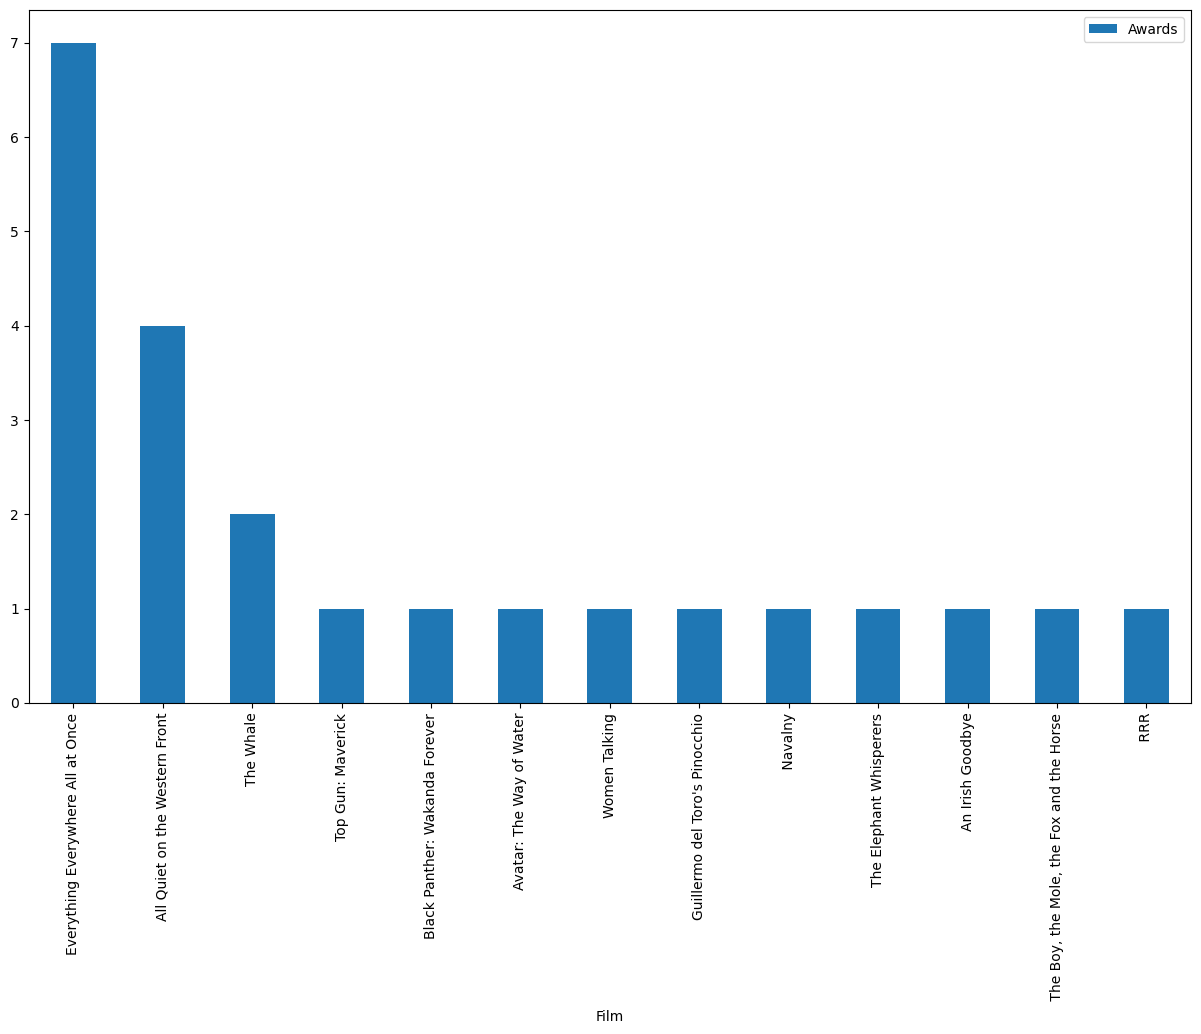

In [85]:
new_oscar_2022.plot.bar(x='Film', y='Awards', figsize=(15,9))
plt.show()

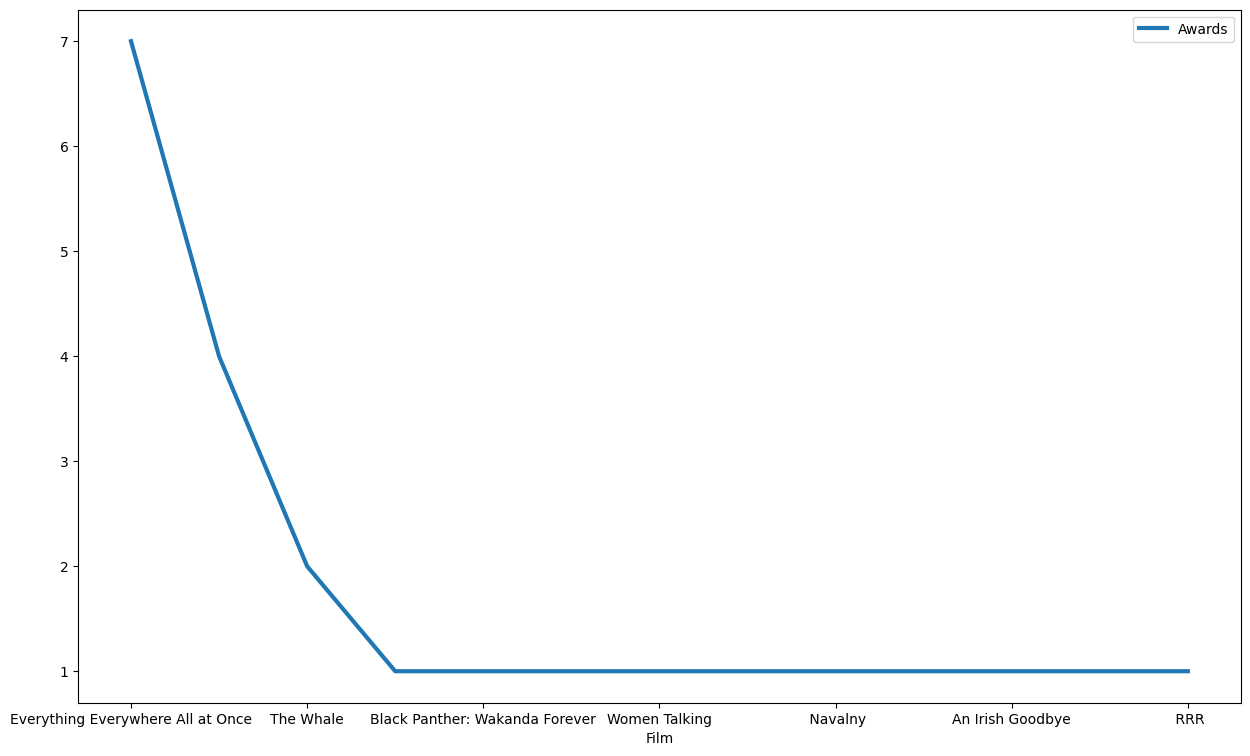

In [89]:
new_oscar_2022.plot.line(x='Film', y='Awards', figsize=(15,9), linewidth=3)
plt.show()

But better way of plotting the above is using **Bar graph**, Line plots generally used to show relationship between two things... which wasn't the case here...and showing the bar graph even to one with less/no programming knowledge can figure out which film has the lowest/highest awards

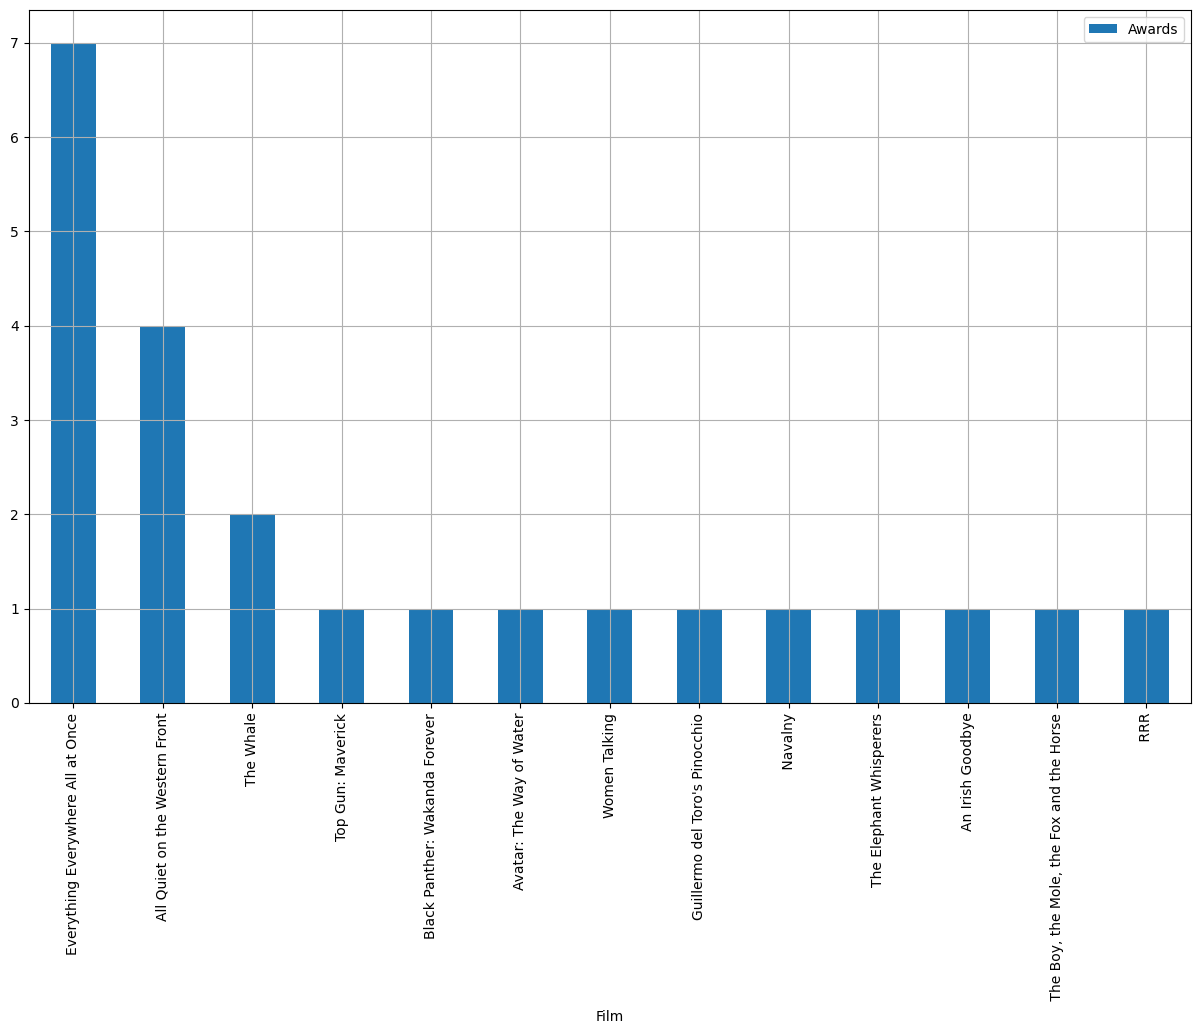

In [91]:
new_oscar_2022.plot.bar(x='Film', y='Awards', figsize=(15,9))
plt.grid()
plt.show()

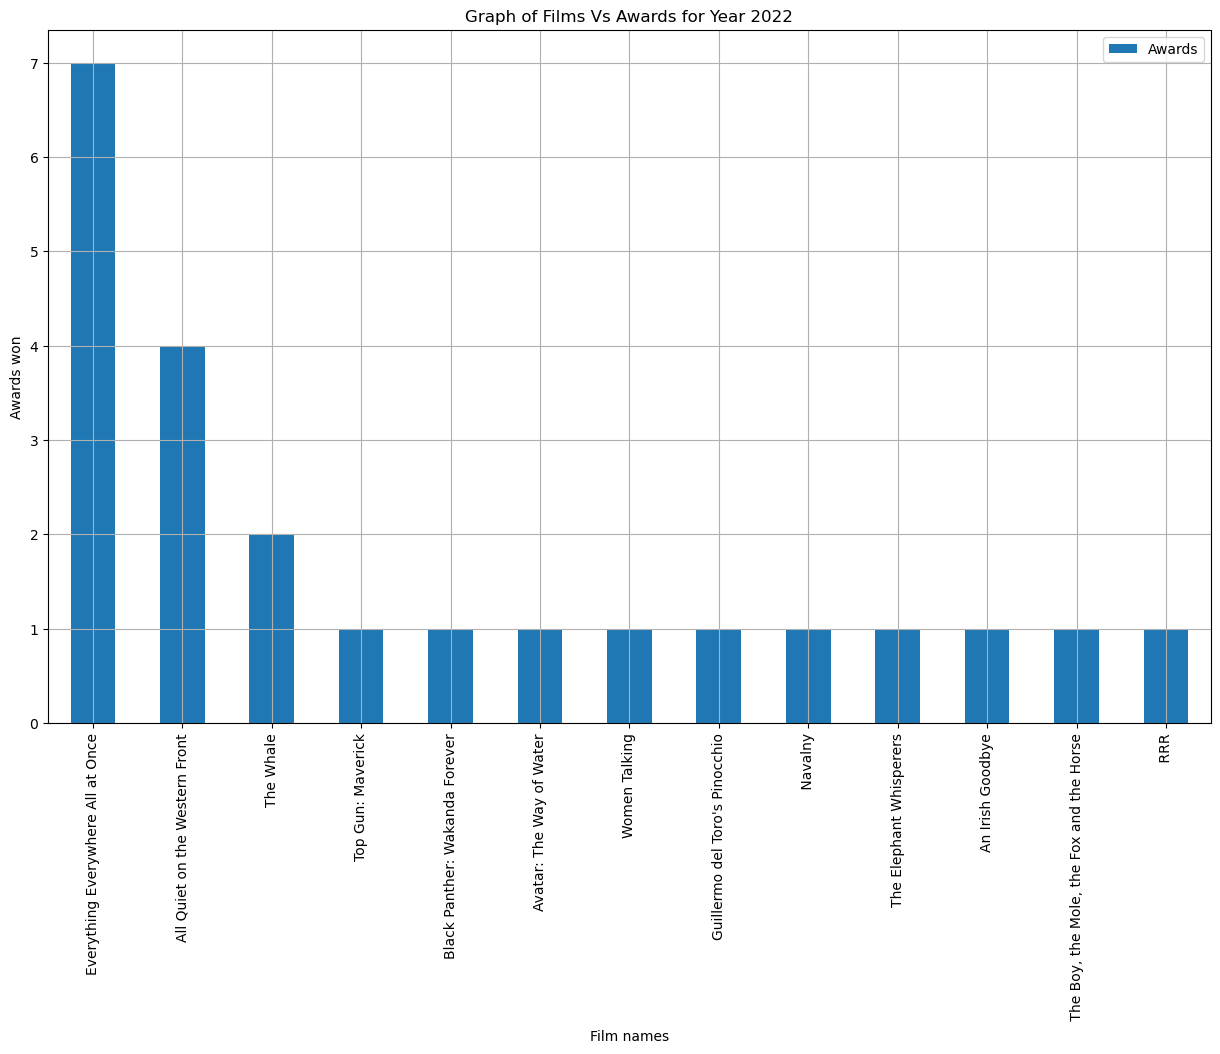

In [92]:
new_oscar_2022.plot.bar(x='Film', y='Awards', figsize=(15,9))
plt.grid()
plt.title("Graph of Films Vs Awards for Year 2022")
plt.xlabel("Film names")
plt.ylabel("Awards won")
plt.show()

_**QN**_: Get the films with awards greater than 5

In [94]:
oscar[oscar['Awards'] > 5]

,Film,Years,Awards,Nominations
0,Everything Everywhere All at Once,2022,7,11
14,Dune,2021,6,10
91,La La Land,2016,6,14
106,Mad Max: Fury Road,2015,6,10
138,Gravity,2013,7,10
192,The Hurt Locker,2009,6,9
206,Slumdog Millionaire,2008,8,10
283,The Lord of the Rings: The Return of the King,2003,11,11
295,Chicago,2002,6,13
353,Shakespeare in Love,1998,7,13


In [95]:
# achieving the same above objective but revealing film names 
oscar[oscar['Awards'] > 5]['Film']

0                   Everything Everywhere All at Once
14                                               Dune
91                                         La La Land
106                                Mad Max: Fury Road
138                                           Gravity
192                                   The Hurt Locker
206                               Slumdog Millionaire
283     The Lord of the Rings: The Return of the King
295                                           Chicago
353                               Shakespeare in Love
365                                           Titanic
376                               The English Patient
408                                      Forrest Gump
424                                  Schindler's List
464                                Dances with Wolves
509                                  The Last Emperor
538                                     Out of Africa
553                                           Amadeus
578                         

_**QN**_: Get the films with **nominations** less than 4 **and** **awards** less than 8

In [99]:
oscar[(oscar['Nominations'] < 4) & (oscar['Awards'] < 8)]

,Film,Years,Awards,Nominations
2,The Whale,2022,2,3
6,Women Talking,2022,1,2
7,Guillermo del Toro's Pinocchio,2022,1,1
8,Navalny,2022,1,1
9,The Elephant Whisperers,2022,1,1
...,...,...,...,...
1350,World Without Sun,1964,1,1
1351,Wrestling Swordfish,32,1,1
1352,Written on the Wind,1956,1,3
1355,The Yankee Doodle Mouse,1943,1,1


In [98]:
oscar[(oscar['Nominations'] < 4) & (oscar['Awards'] < 8)]['Film']

2                            The Whale
6                        Women Talking
7       Guillermo del Toro's Pinocchio
8                              Navalny
9              The Elephant Whisperers
                     ...              
1350                 World Without Sun
1351               Wrestling Swordfish
1352               Written on the Wind
1355           The Yankee Doodle Mouse
1357     Yesterday, Today and Tomorrow
Name: Film, Length: 804, dtype: object

In [100]:
# Getting the Co relations
oscar.corr()

,Awards,Nominations
Awards,1.00000,0.69011
Nominations,0.69011,1.00000


Can conclude that Awards and Nominations are **moderalety high positive co-related**

<AxesSubplot:>

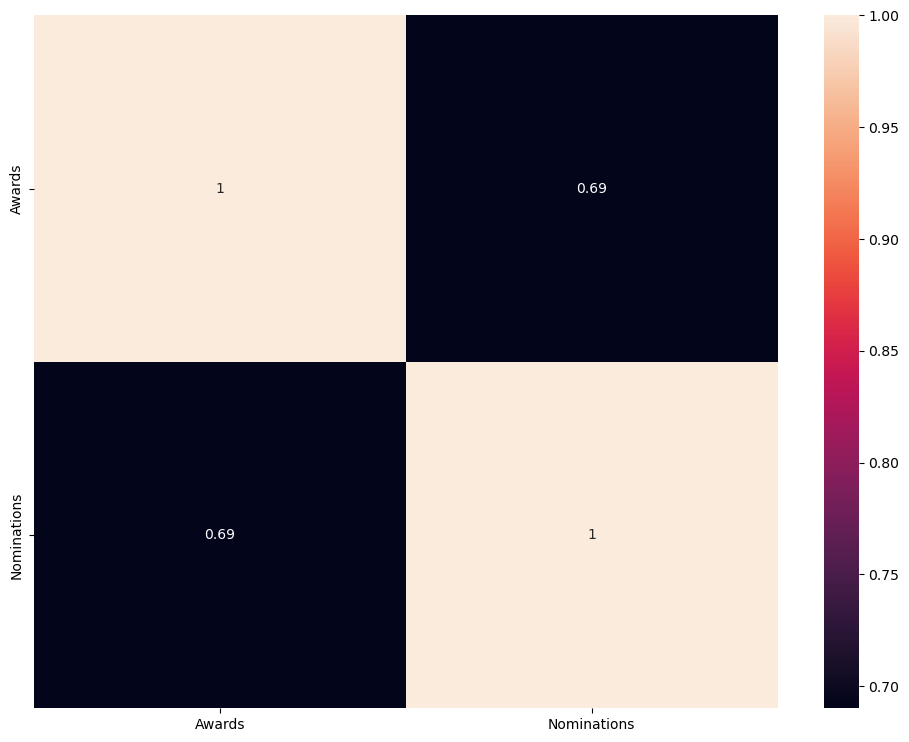

In [102]:
# heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(oscar.corr(), annot=True)